In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

In [2]:
# Cargar el dataset
dataset = pd.read_csv('twits_25k_balanced.csv')  
# Preparación de los datos
X = dataset['tweet']
y = dataset['label']

# Dividir el dataset en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Vectorización de los tweets
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Entrenamiento del modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Predicción y Evaluación
y_pred = nb_model.predict(X_test_vectorized)


In [4]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       296
           1       0.68      0.80      0.74       294
           2       0.88      0.77      0.82       268

    accuracy                           0.75       858
   macro avg       0.77      0.75      0.76       858
weighted avg       0.76      0.75      0.76       858



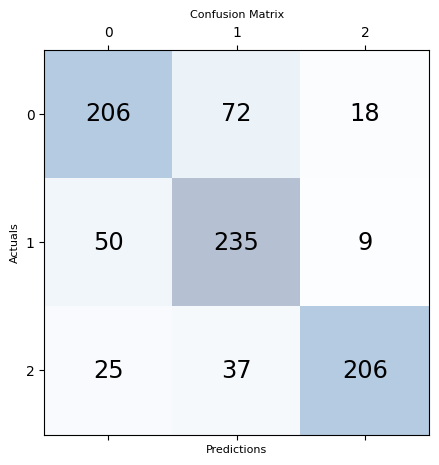

In [10]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización gráfica de la Matriz de Confusión
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=8)
plt.ylabel('Actuals', fontsize=8)
plt.title('Confusion Matrix', fontsize=8)
plt.show()

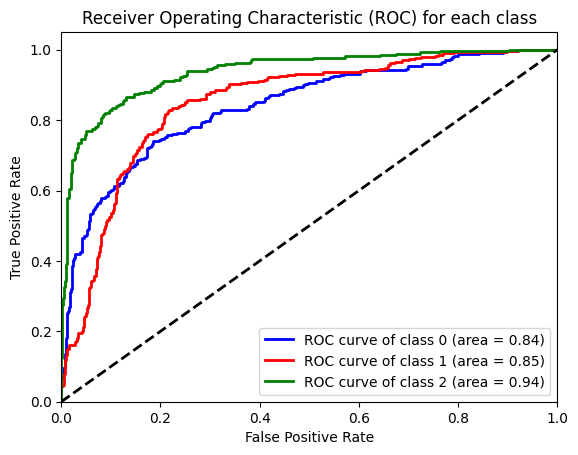

In [6]:
# ROC/AUC
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Entrenamiento de un modelo Naive Bayes para cada clase
classifier = OneVsRestClassifier(MultinomialNB())
classifier.fit(X_train_vectorized, label_binarize(y_train, classes=[0, 1, 2]))
y_score = classifier.predict_proba(X_test_vectorized)

# Calcular ROC y AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=[0, 1, 2])[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Dibujar la curva ROC para cada clase
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for each class')
plt.legend(loc="lower right")
plt.show()

In [11]:
dataset

,id,label,tweet
0,6088,0,who cares th ones a thirty dirty argentina &a...
1,5283,1,msnbc the same ms who said blocking flights f...
2,18442,0,it i hate a bitch dat act like a night. &128530;
3,6715,0,ha ha ha no good fat duke
4,13003,0,lynch mob thus threaten zimmerman jury; &8216;...
...,...,...,...
4285,15329,0,it tell me how you really feel. it those lit...
4286,2205,2,*waits for fanduel to hit me with the fig*
4287,13791,0,"not trying to follow any spoons, no offense ..."
4288,3783,0,sweet comeback u fucking herb i dint watch so...


In [7]:
pip install Flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install joblib


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import joblib

# Guardar el modelo de Naive Bayes y el vectorizador
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

# Si también quieres guardar el modelo OneVsRestClassifier
joblib.dump(classifier, 'one_vs_rest_classifier.pkl')


['one_vs_rest_classifier.pkl']